In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the data
df = pd.read_csv("C:/Abhinav/Test/NLP/seattle-weather.csv")

In [3]:
# functions to convert dataframe to input and output sequences
def df_to_XY(df, window_size=10):
    X_train = []
    y_train = []
    for i in range(window_size, len(df)):
        X_train.append(df.iloc[i-window_size:i, 2:3].values)
        y_train.append(df.iloc[i, 2])
    X_train, y_train = np.array(X_train), np.array(y_train)
    return X_train, y_train

In [4]:
WINDOW = 10

# convert data to input and output sequences
X, y = df_to_XY(df, WINDOW)

In [5]:
# split data into train, validation, and test sets
X_train = X[:800]
y_train = y[:800]
X_val = X[800:1000]
y_val = y[800:1000]
X_test = X[1000:]
y_test = y[1000:]

In [6]:
# reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [7]:
# LSTM model
lstm_regressor = Sequential()
lstm_regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_regressor.add(Dropout(0.2))
lstm_regressor.add(LSTM(units=50, return_sequences=True))
lstm_regressor.add(Dropout(0.2))
lstm_regressor.add(LSTM(units=50, return_sequences=True))
lstm_regressor.add(Dropout(0.2))
lstm_regressor.add(LSTM(units=50))
lstm_regressor.add(Dropout(0.2))
lstm_regressor.add(Dense(units=1))
lstm_regressor.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
history_lstm = lstm_regressor.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

Epoch 1/50

25/25 [==============================] - 14s 132ms/step - loss: 199.3204 - val_loss: 225.5371
Epoch 2/50
25/25 [==============================] - 1s 24ms/step - loss: 84.2646 - val_loss: 145.2153
Epoch 3/50
25/25 [==============================] - 1s 23ms/step - loss: 65.0351 - val_loss: 121.1838
Epoch 4/50
25/25 [==============================] - 1s 24ms/step - loss: 59.3472 - val_loss: 104.7639
Epoch 5/50
25/25 [==============================] - 1s 24ms/step - loss: 56.4933 - val_loss: 93.9883
Epoch 6/50
25/25 [==============================] - 1s 24ms/step - loss: 55.4532 - val_loss: 87.3726
Epoch 7/50
25/25 [==============================] - 1s 25ms/step - loss: 54.6439 - val_loss: 82.5275
Epoch 8/50
25/25 [==============================] - 1s 24ms/step - loss: 54.1839 - val_loss: 78.9672
Epoch 9/50
25/25 [==============================] - 1s 24ms/step - loss: 53.2759 - val_loss: 77.3937
Epoch 10/50
25/25 [==============================] - 1s 24ms/step - loss: 53.4428 -

In [9]:
# SimpleRNN Model
rnn_regressor = Sequential()
rnn_regressor.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
rnn_regressor.add(Dropout(0.2))
rnn_regressor.add(SimpleRNN(units=50, return_sequences=True))
rnn_regressor.add(Dropout(0.2))
rnn_regressor.add(SimpleRNN(units=50, return_sequences=True))
rnn_regressor.add(Dropout(0.2))
rnn_regressor.add(SimpleRNN(units=50))
rnn_regressor.add(Dropout(0.2))
rnn_regressor.add(Dense(units=1))
rnn_regressor.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
history_rnn = rnn_regressor.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

Epoch 1/50
25/25 [==============================] - 7s 47ms/step - loss: 179.3506 - val_loss: 233.5486
Epoch 2/50
25/25 [==============================] - 0s 15ms/step - loss: 95.6125 - val_loss: 171.0557
Epoch 3/50
25/25 [==============================] - 0s 16ms/step - loss: 75.7426 - val_loss: 144.8638
Epoch 4/50
25/25 [==============================] - 0s 15ms/step - loss: 66.9895 - val_loss: 126.0089
Epoch 5/50
25/25 [==============================] - 0s 15ms/step - loss: 59.3008 - val_loss: 109.1154
Epoch 6/50
25/25 [==============================] - 0s 16ms/step - loss: 50.5290 - val_loss: 96.5870
Epoch 7/50
25/25 [==============================] - 0s 15ms/step - loss: 43.9522 - val_loss: 83.2129
Epoch 8/50
25/25 [==============================] - 0s 15ms/step - loss: 36.6858 - val_loss: 72.5134
Epoch 9/50
25/25 [==============================] - 0s 14ms/step - loss: 32.3927 - val_loss: 62.7429
Epoch 10/50
25/25 [==============================] - 0s 15ms/step - loss: 30.0157 - v

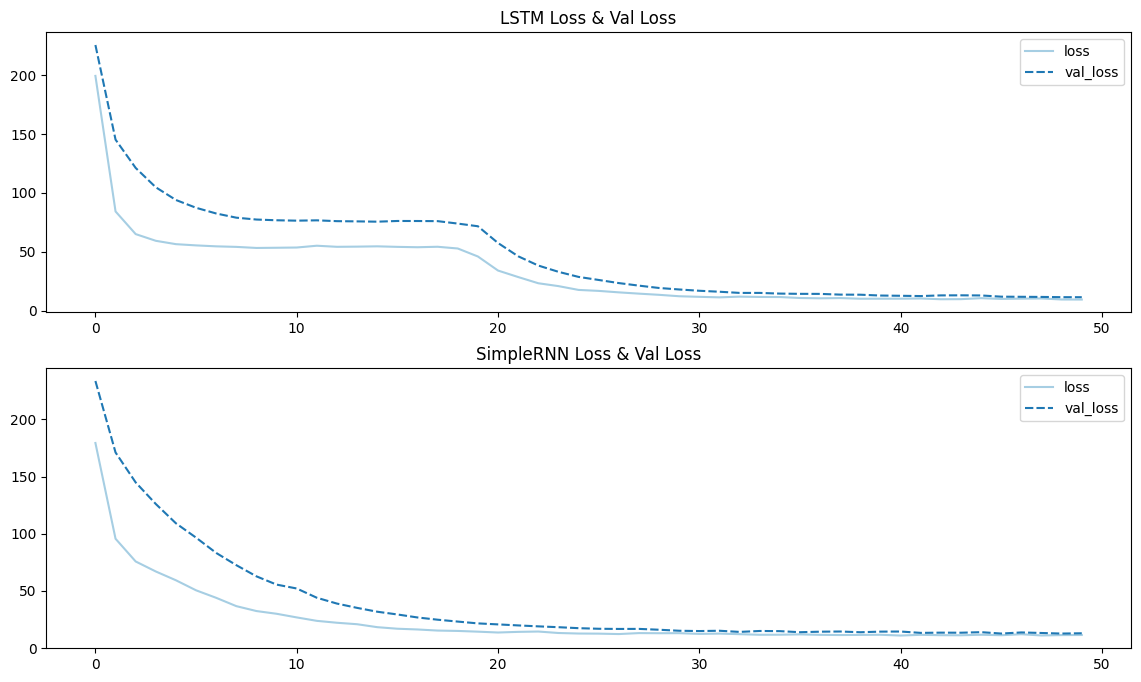

In [11]:
# LSTM Loss Visualization
his_lstm = pd.DataFrame(history_lstm.history)
history_loss_lstm = his_lstm[['loss', 'val_loss']]

fig, axes = plt.subplots(2, 1, figsize=(14, 8))
plt.subplot(2, 1, 1)
plt.title("LSTM Loss & Val Loss")
sns.lineplot(data=history_loss_lstm, palette='Paired')

# simpleRNN Loss Visualization
his_rnn = pd.DataFrame(history_rnn.history)
history_loss_rnn = his_rnn[['loss', 'val_loss']]

plt.subplot(2, 1, 2)
plt.title("SimpleRNN Loss & Val Loss")
sns.lineplot(data=history_loss_rnn, palette='Paired')

plt.show()

15/15 [==============================] - 0s 10ms/step


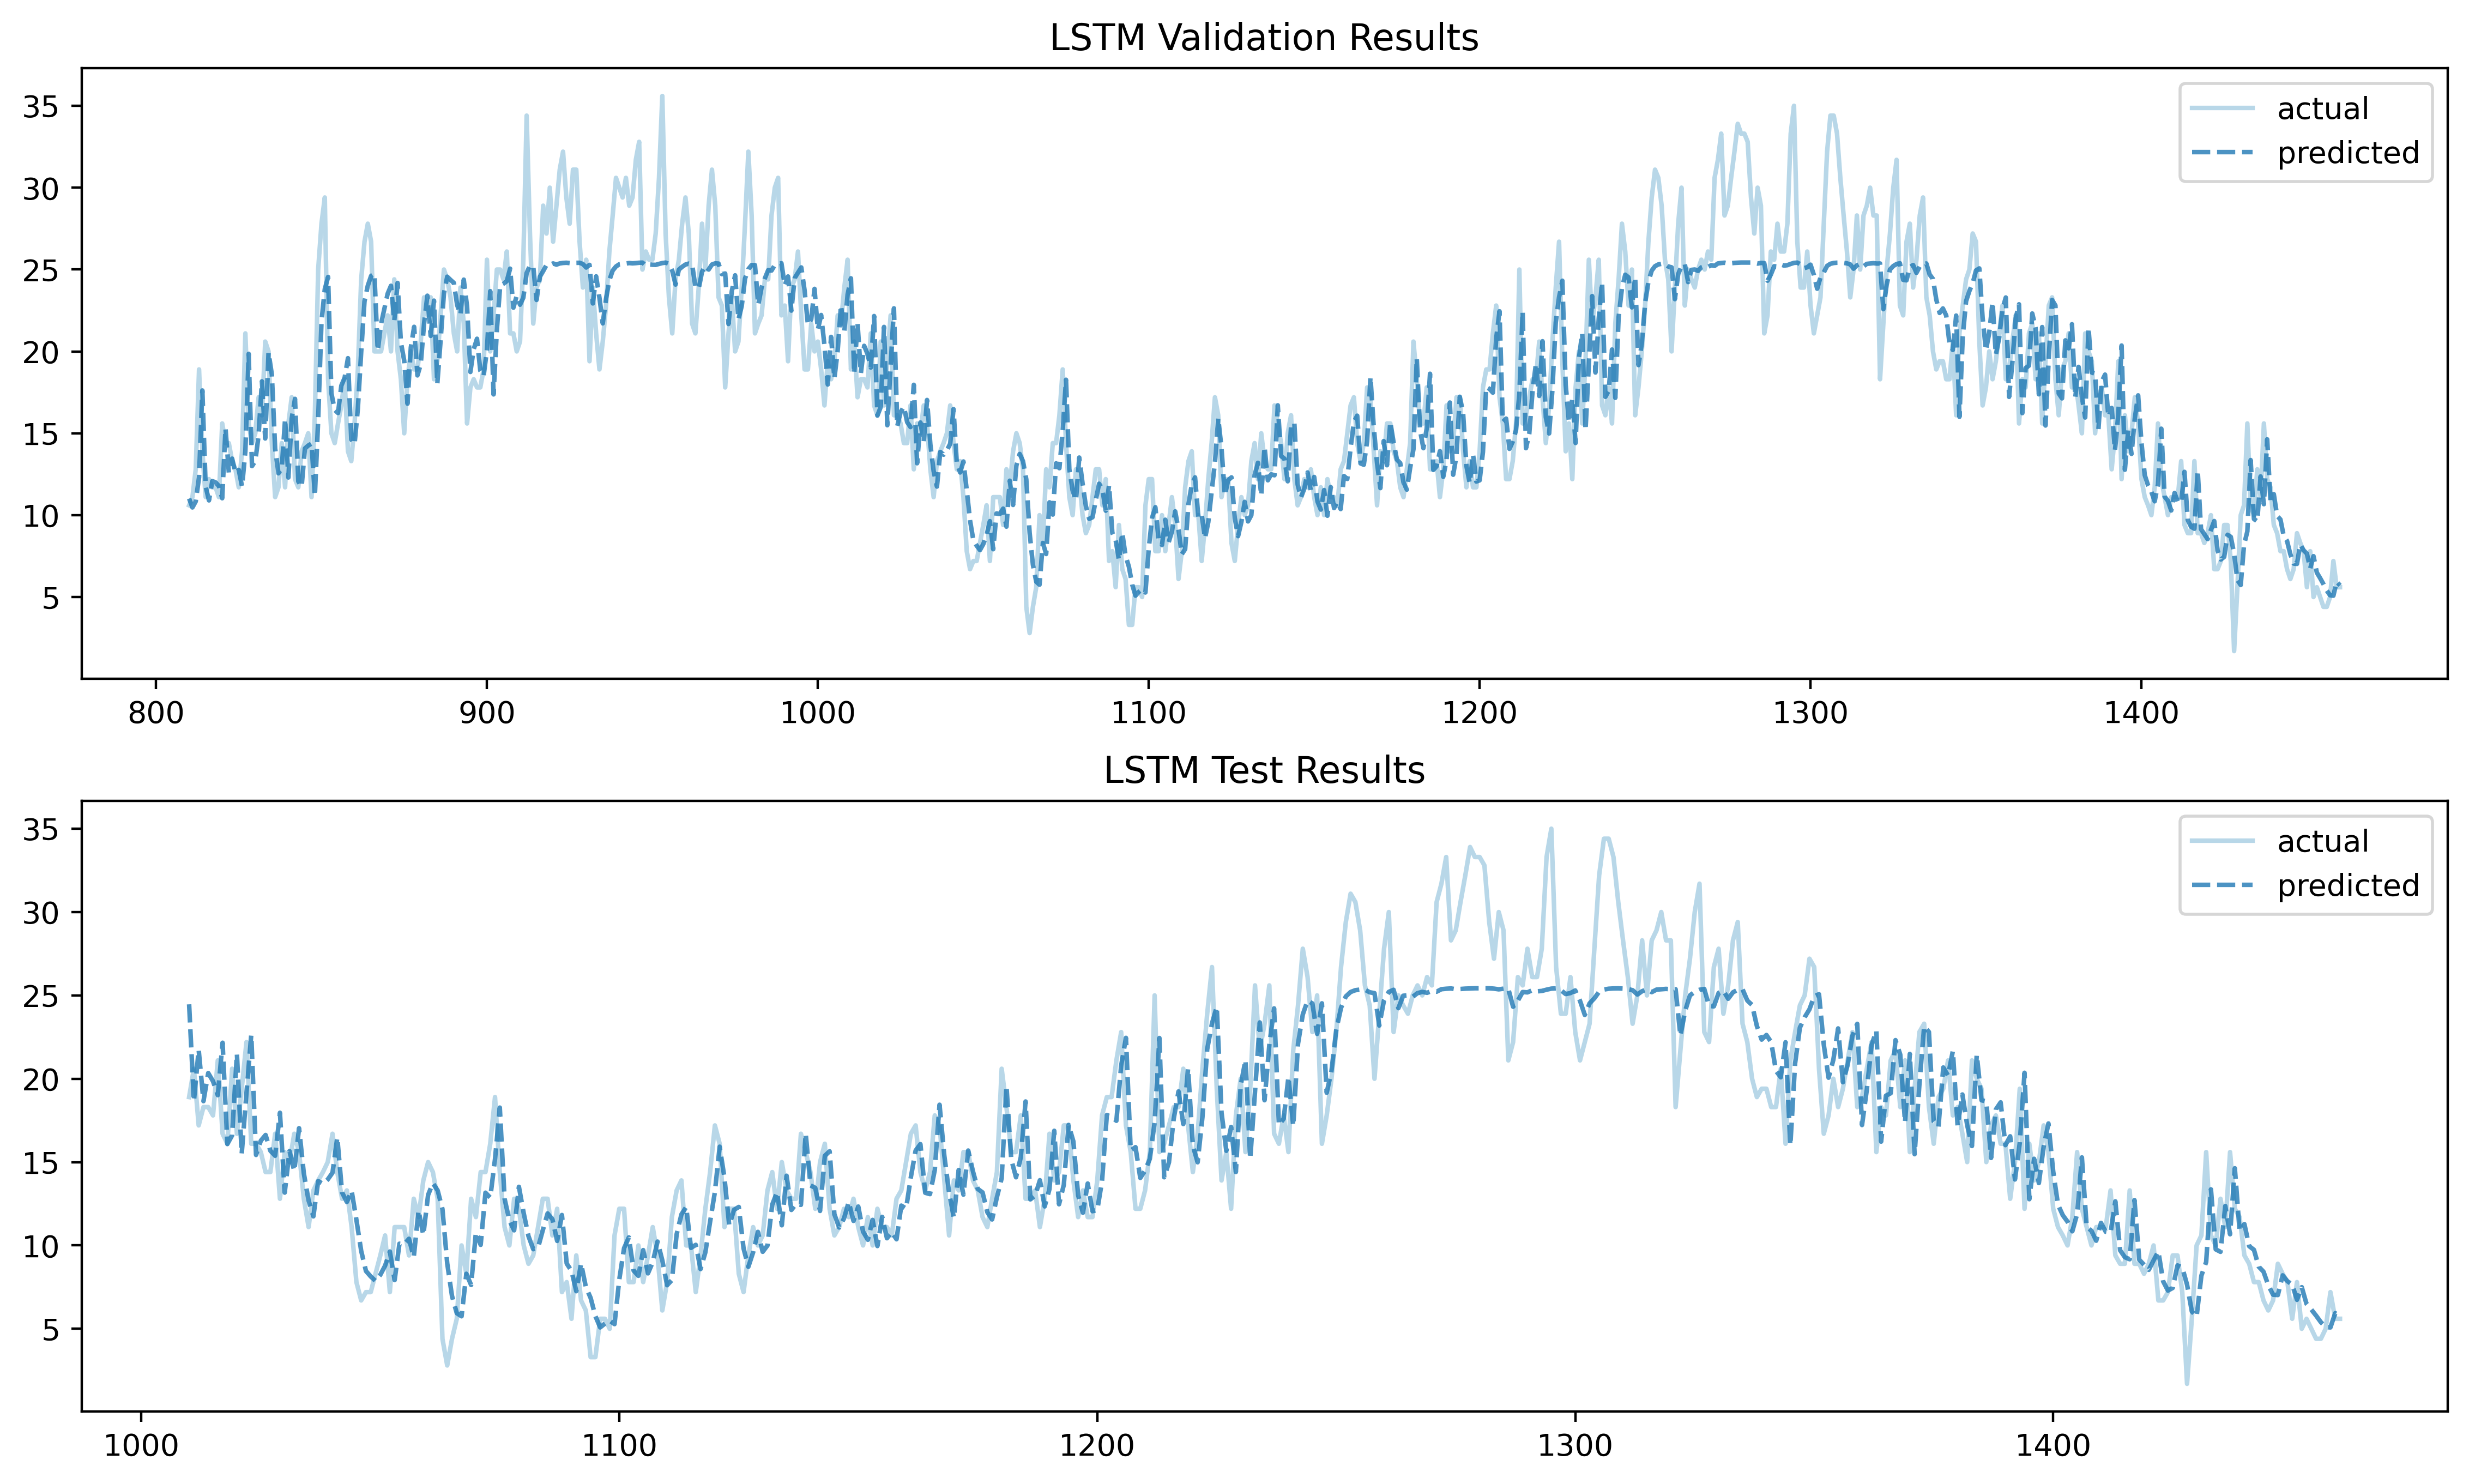

In [12]:
# LSTM Prediction visualization
train_pred_lstm = lstm_regressor.predict(X_train).flatten()
val_pred_lstm = lstm_regressor.predict(X_val).flatten()
test_pred_lstm = lstm_regressor.predict(X_test).flatten()

pred_lstm = np.concatenate([train_pred_lstm, val_pred_lstm, test_pred_lstm])
df_pred_lstm = pd.DataFrame(df["temp_max"].copy())
df_pred_lstm.columns = ["actual"]
df_pred_lstm = df_pred_lstm[WINDOW:]
df_pred_lstm["predicted"] = pred_lstm

fig, axes = plt.subplots(2, 1, figsize=(14, 8), dpi=400)

plt.subplot(2, 1, 1)
plt.title("LSTM Validation Results")
sns.lineplot(data=df_pred_lstm[800:], alpha=0.8, palette="Paired", linestyle=None)

plt.subplot(2, 1, 2)
plt.title("LSTM Test Results")
sns.lineplot(data=df_pred_lstm[1000:], alpha=0.8, palette="Paired", linestyle=None)

plt.show()

15/15 [==============================] - 0s 6ms/step


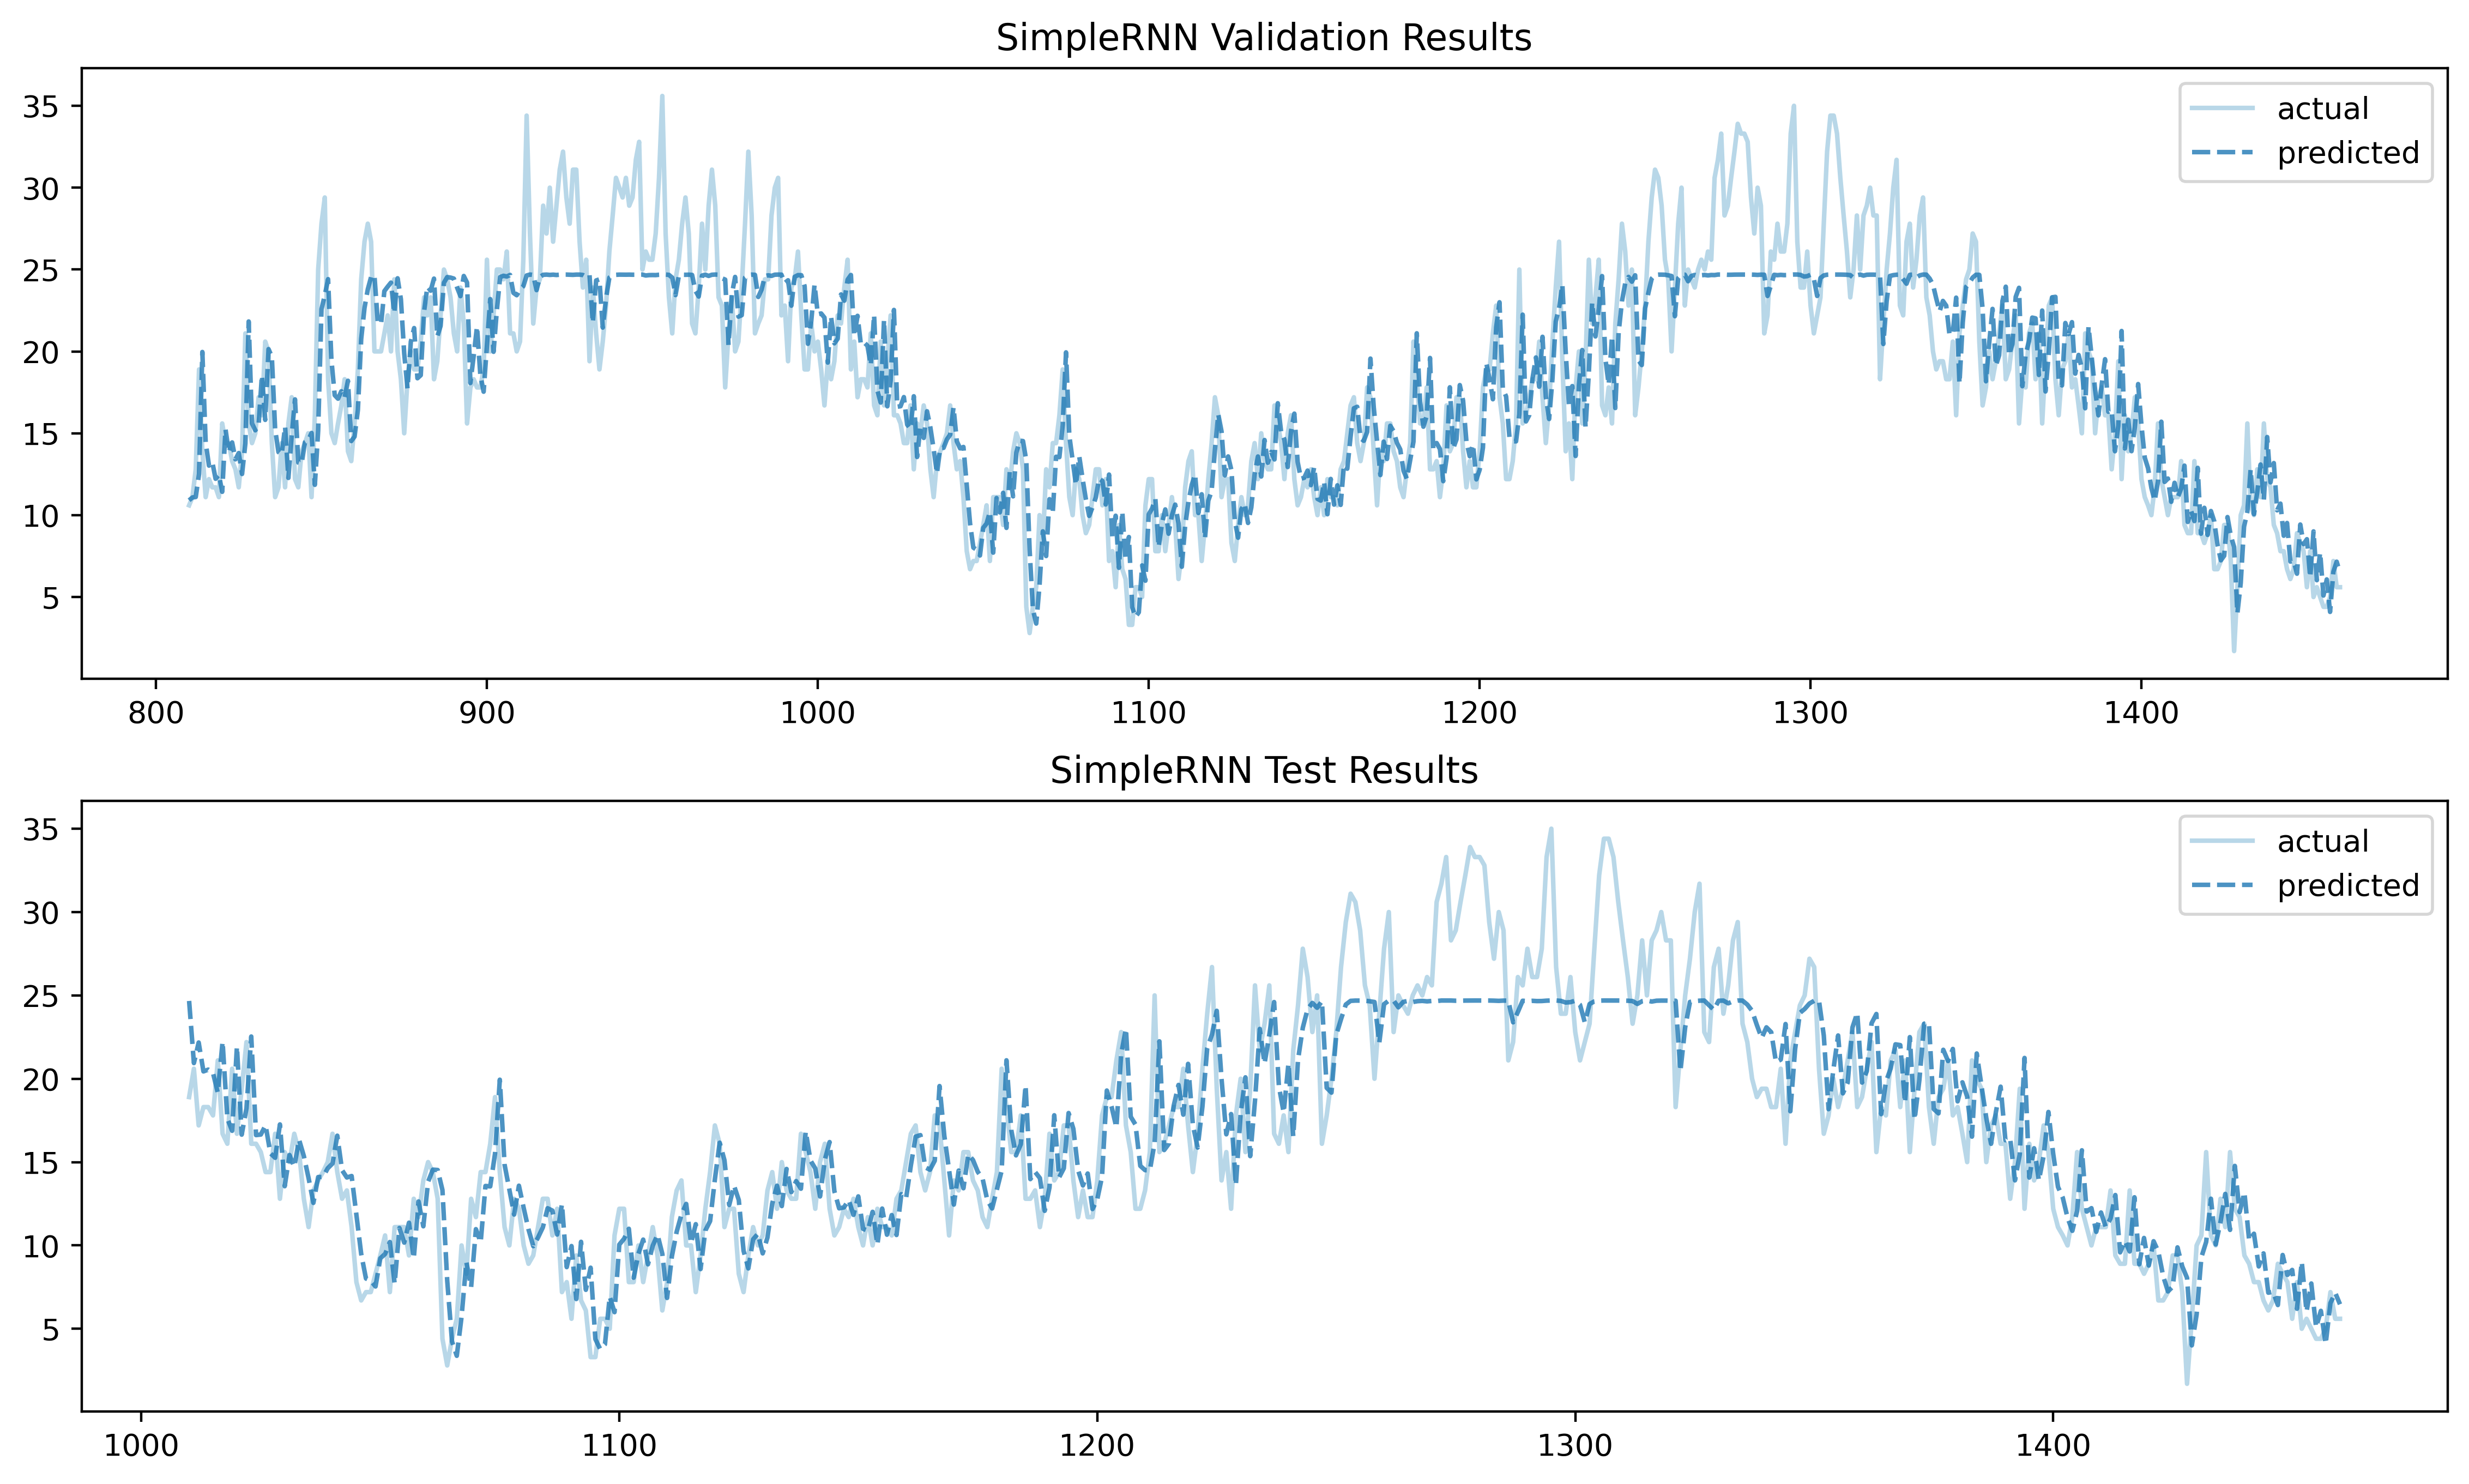

In [13]:
# SimpleRNN Prediction Visualization
train_pred_rnn = rnn_regressor.predict(X_train).flatten()
val_pred_rnn = rnn_regressor.predict(X_val).flatten()
test_pred_rnn = rnn_regressor.predict(X_test).flatten()

pred_rnn = np.concatenate([train_pred_rnn, val_pred_rnn, test_pred_rnn])
df_pred_rnn = pd.DataFrame(df["temp_max"].copy())
df_pred_rnn.columns = ["actual"]
df_pred_rnn = df_pred_rnn[WINDOW:]
df_pred_rnn["predicted"] = pred_rnn

fig, axes = plt.subplots(2, 1, figsize=(14, 8), dpi=400)

plt.subplot(2, 1, 1)
plt.title("SimpleRNN Validation Results")
sns.lineplot(data=df_pred_rnn[800:], alpha=0.8, palette="Paired", linestyle=None)

plt.subplot(2, 1, 2)
plt.title("SimpleRNN Test Results")
sns.lineplot(data=df_pred_rnn[1000:], alpha=0.8, palette="Paired", linestyle=None)

plt.show()

In machine translation, the goal is to automatically translate text-to-speech from one language to another. This process involves using computational techniques to analyze and understand the meaning of the source text and then generate equivalent text in the target language.

We will be using **googletrans**, and the **Translator** module from the package to perform the "machine translation" task.

In [1]:
from googletrans import Translator

def translate_text(text, dest_lang='ml'):
    translator = Translator()
    translated_text = translator.translate(text, dest=dest_lang)
    return translated_text.text

# take user input
text_to_translate = input("Enter the text to translate to French: ")

# translate text to French
translated_text = translate_text(text_to_translate, dest_lang='ml')

# print translated text
print("Translated text: ", translated_text)

Translated text:  ഹലോ, എന്റെ പേര് അഭീന


All the language codes:

- Afrikaans: 'af'
- Albanian: 'sq'
- Amharic: 'am'
- Arabic: 'ar'
- Armenian: 'hy'
- Azerbaijani: 'az'
- Basque: 'eu'
- Belarusian: 'be'
- Bengali: 'bn'
- Bosnian: 'bs'
- Bulgarian: 'bg'
- Catalan: 'ca'
- Cebuano: 'ceb' (not available in googletrans)
- Chichewa: 'ny' (not available in googletrans)
- Chinese (Simplified): 'zh-CN' or 'zh' (preferred)
- Chinese (Traditional): 'zh-TW'
- Corsican: 'co'
- Croatian: 'hr'
- Czech: 'cs'
- Danish: 'da'
- Dutch: 'nl'
- English: 'en'
- Esperanto: 'eo'
- Estonian: 'et'
- Filipino: 'tl' (not available in googletrans)
- Finnish: 'fi'
- French: 'fr'
- Frisian: 'fy' (not available in googletrans)
- Galician: 'gl'
- Georgian: 'ka'
- German: 'de'
- Greek: 'el'
- Gujarati: 'gu'
- Haitian Creole: 'ht' (not available in googletrans)
- Hausa: 'ha' (not available in googletrans)
- Hawaiian: 'haw' (not available in googletrans)
- Hebrew: 'iw' or 'he' (preferred)
- Hindi: 'hi'
- Hmong: 'hmn' (not available in googletrans)
- Hungarian: 'hu'
- Icelandic: 'is'
- Igbo: 'ig' (not available in googletrans)
- Indonesian: 'id' or 'in' (preferred)
- Irish: 'ga'
- Italian: 'it'
- Japanese: 'ja'
- Javanese: 'jw' (not available in googletrans)
- Kannada: 'kn'
- Kazakh: 'kk'
- Khmer: 'km'
- Kinyarwanda: 'rw' (not available in googletrans)
- Korean: 'ko'
- Kurdish (Kurmanji): 'ku' (not available in googletrans)
- Kyrgyz: 'ky'
- Lao: 'lo'
- Latin: 'la'
- Latvian: 'lv'
- Lithuanian: 'lt'
- Luxembourgish: 'lb' (not available in googletrans)
- Macedonian: 'mk'
- Malagasy: 'mg' (not available in googletrans)
- Malay: 'ms'
- Malayalam: 'ml'
- Maltese: 'mt'
- Maori: 'mi' (not available in googletrans)
- Marathi: 'mr'
- Mongolian: 'mn'
- Myanmar (Burmese): 'my'
- Nepali: 'ne'
- Norwegian: 'no' (not available in googletrans)
- Odia (Oriya): 'or'
- Pashto: 'ps' (not available in googletrans)
- Persian: 'fa'
- Polish: 'pl'
- Portuguese: 'pt'
- Punjabi: 'pa'
- Romanian: 'ro'
- Russian: 'ru'
- Samoan: 'sm' (not available in googletrans)
- Scots Gaelic: 'gd' (not available in googletrans)
- Serbian: 'sr'
- Sesotho: 'st' (not available in googletrans)
- Shona: 'sn' (not available in googletrans)
- Sindhi: 'sd' (not available in googletrans)
- Sinhala: 'si'
- Slovak: 'sk'
- Slovenian: 'sl'
- Somali: 'so' (not available in googletrans)
- Spanish: 'es'
- Sundanese: 'su' (not available in googletrans)
- Swahili: 'sw'
- Swedish: 'sv'
- Tajik: 'tg' (not available in googletrans)
- Tamil: 'ta'
- Tatar: 'tt' (not available in googletrans)
- Telugu: 'te'
- Thai: 'th'
- Turkish: 'tr'
- Turkmen: 'tk' (not available in googletrans)
- Ukrainian: 'uk'
- Urdu: 'ur'
- Uyghur: 'ug' (not available in googletrans)
- Uzbek: 'uz'
- Vietnamese: 'vi'
- Welsh: 'cy'
- Xhosa: 'xh' (not available in googletrans)
- Yiddish: 'yi' (not available in googletrans)
- Yoruba: 'yo' (not available in googletrans)
- Zulu: 'zu' (not available in googletrans)